In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/fitness_dataset.csv")

In [3]:
df.head()

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          NaN   
1   69        186         95        60.8           114.8          7.5   
2   46        192        103        61.4           116.4          NaN   
3   32        189         83        60.2           130.1          7.0   
4   60        175         99        58.1           115.8          8.0   

   nutrition_quality  activity_index smokes gender  is_fit  
0               2.37            3.97     no      F       1  
1               8.77            3.19      0      F       1  
2               8.20            2.03      0      F       0  
3               6.18            3.68      0      M       1  
4               9.95            4.83    yes      F       1

In [4]:
print(df.shape)         # Rows & columns
print(df.info())        # Data types & nulls
print(df.describe())    # Summary statistics


(2000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB
None
               age   height_cm    weight_kg   heart_rate  blood_pressure  \
count  2000.000000  2000.00000  2000.000000  2000.000000     2000.000000   
mean     49.114000   174.53300    83.

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, height_cm, weight_kg, heart_rate, blood_pressure, sleep_hours, nutrition_quality, activity_index, smokes, gender, is_fit]
Index: []

In [6]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [7]:
df.nunique()

age                   62
height_cm             50
weight_kg             80
heart_rate           484
blood_pressure       563
sleep_hours           79
nutrition_quality    866
activity_index       398
smokes                 4
gender                 2
is_fit                 2
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100

age                  0.0
height_cm            0.0
weight_kg            0.0
heart_rate           0.0
blood_pressure       0.0
sleep_hours          8.0
nutrition_quality    0.0
activity_index       0.0
smokes               0.0
gender               0.0
is_fit               0.0
dtype: float64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB
None


In [10]:
df['smokes'].unique()

array(['no', '0', 'yes', '1'], dtype=object)

In [11]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['gender']=df['gender'].map({'F':0,'M':1})

In [13]:
df['smokes'] = df['smokes'].map({'no': 0, '0': 0, 'yes': 1, '1': 1})


In [14]:
df['sleep_hours']=df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [15]:
df.head()


age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0     7.513315   
1   69        186         95        60.8           114.8     7.500000   
2   46        192        103        61.4           116.4     7.513315   
3   32        189         83        60.2           130.1     7.000000   
4   60        175         99        58.1           115.8     8.000000   

   nutrition_quality  activity_index  smokes  gender  is_fit  
0               2.37            3.97       0       0       1  
1               8.77            3.19       0       0       1  
2               8.20            2.03       0       0       0  
3               6.18            3.68       0       1       1  
4               9.95            4.83       1       0       1

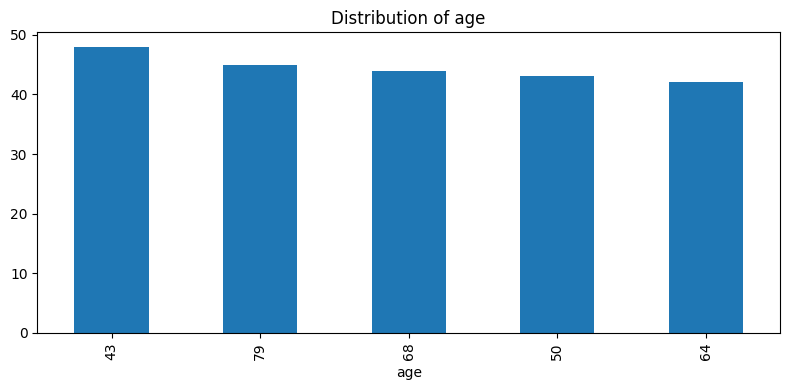

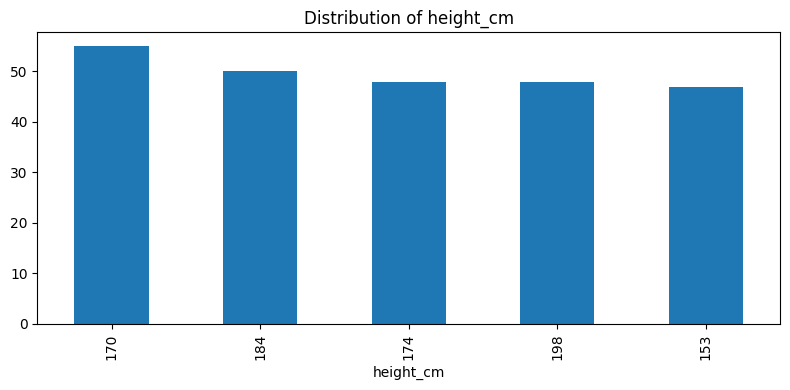

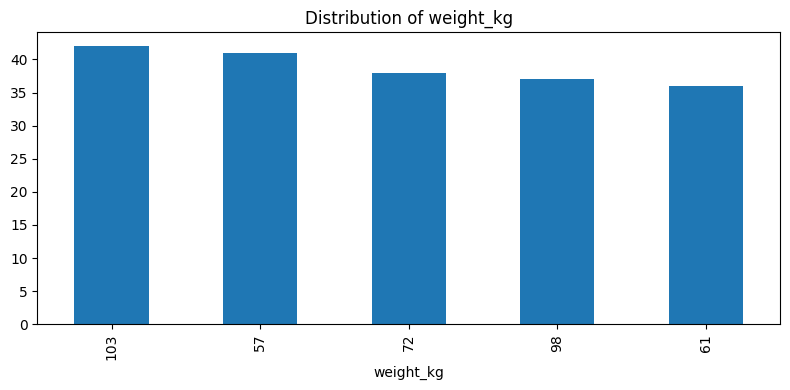

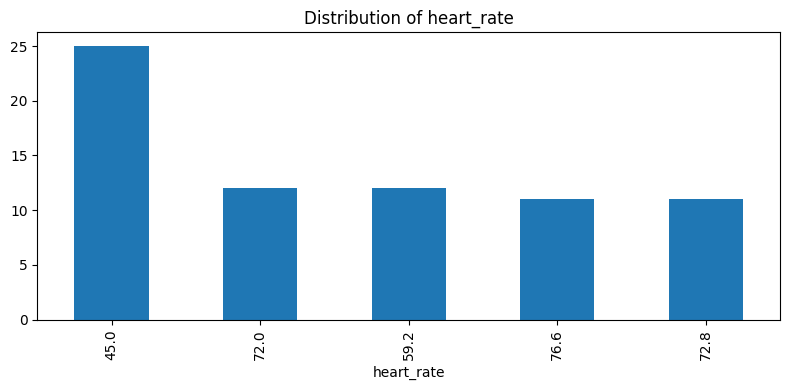

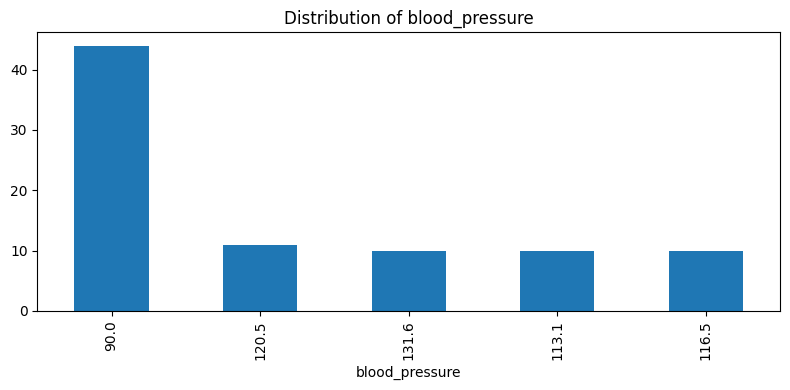

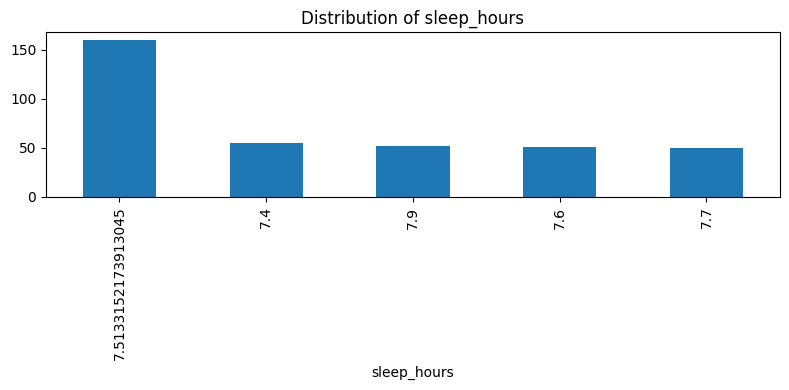

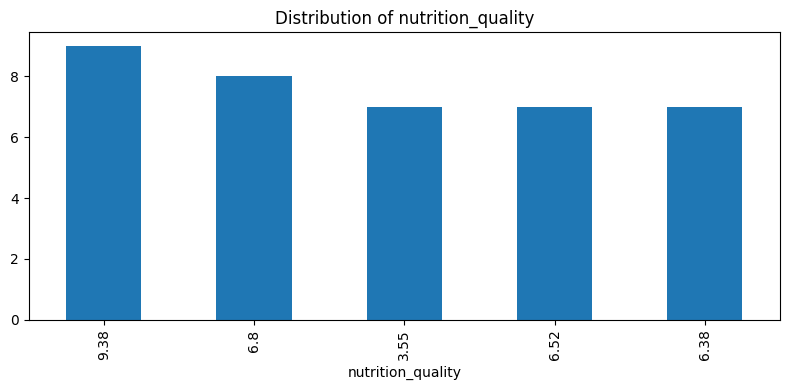

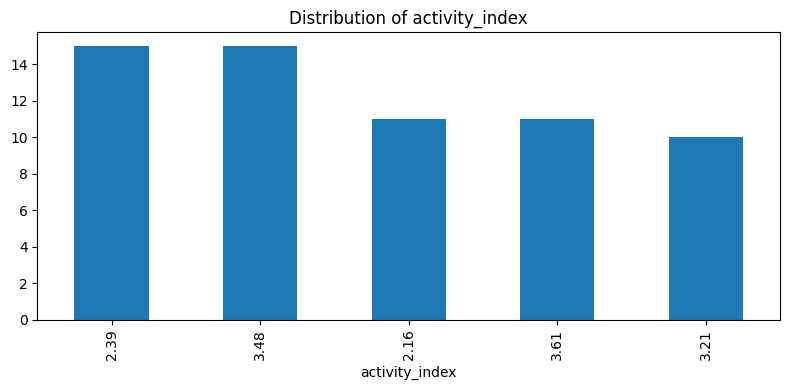

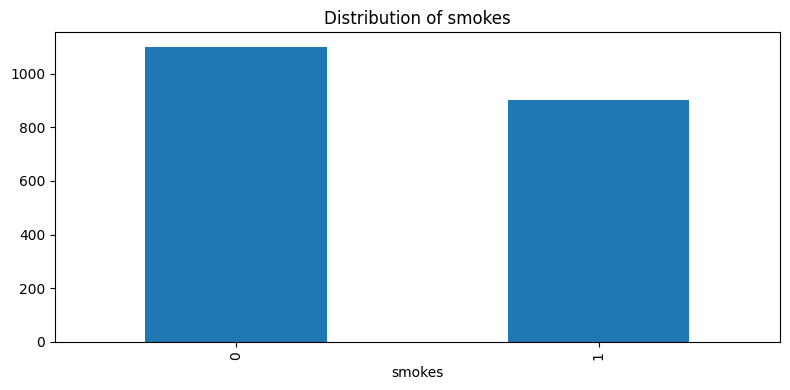

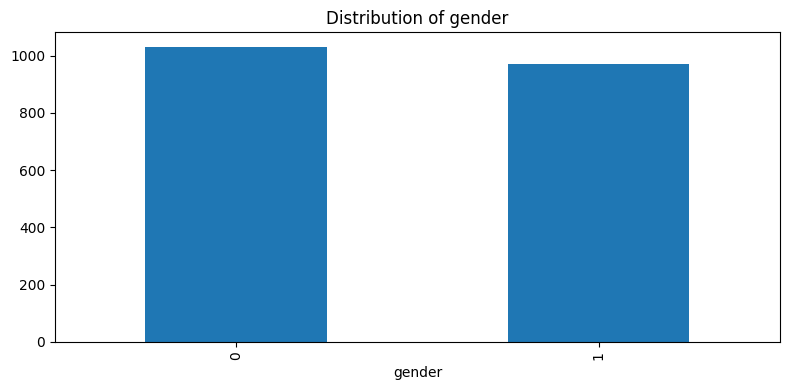

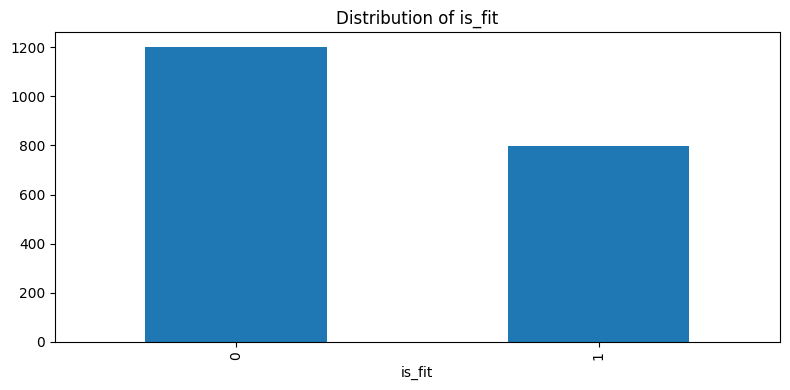

In [16]:
for col in df.columns:
    plt.figure(figsize=(8,4))

    if df[col].dtype == 'object':
        # Categorical column -> countplot
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
    else:
        # Numerical column -> bar plot of mean values
        df[col].value_counts().head().plot(kind='bar')
        plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

Line graph


In [17]:
df.dtypes

age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                 int64
gender                 int64
is_fit                 int64
dtype: object

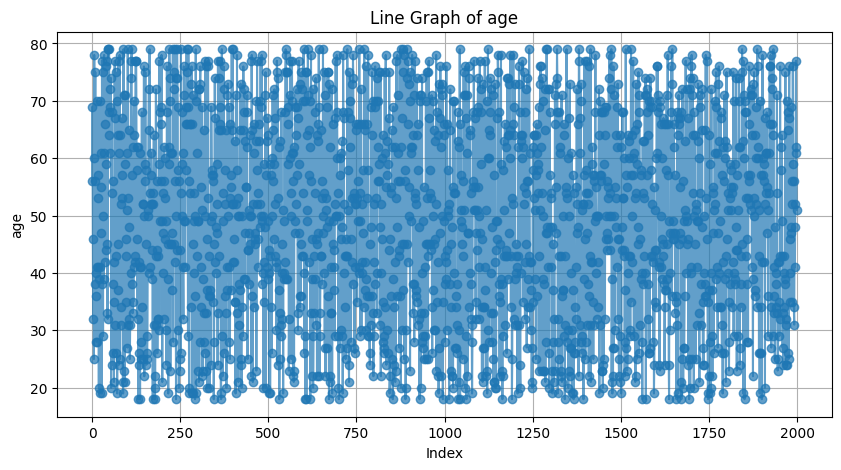

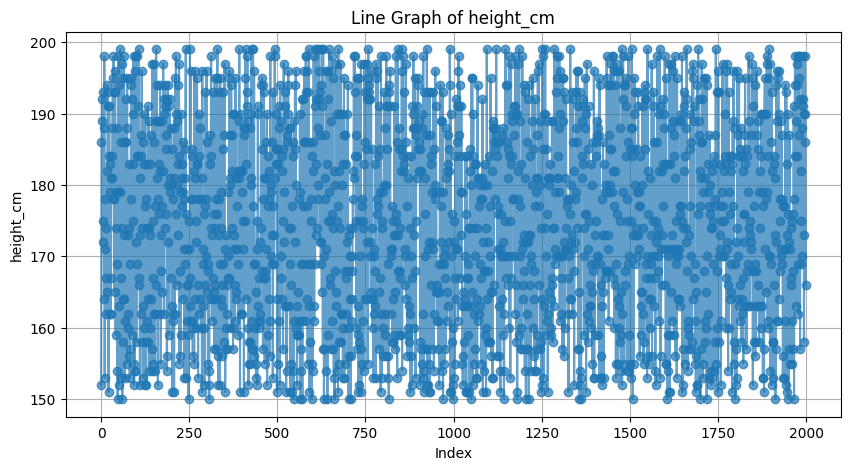

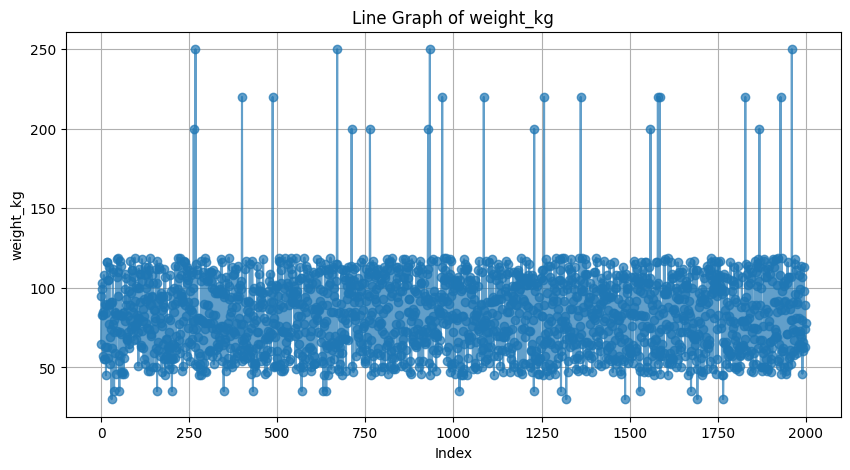

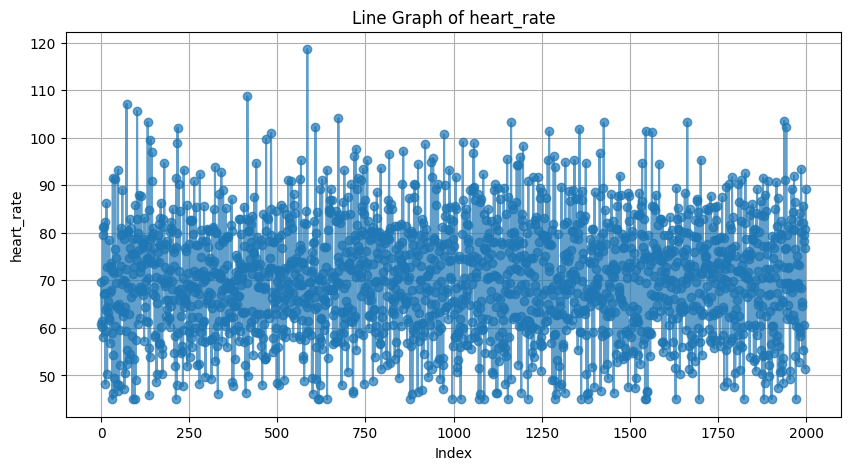

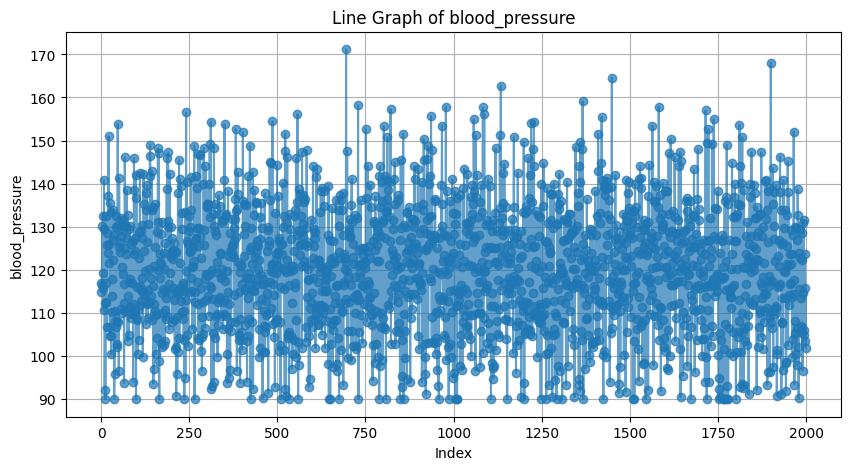

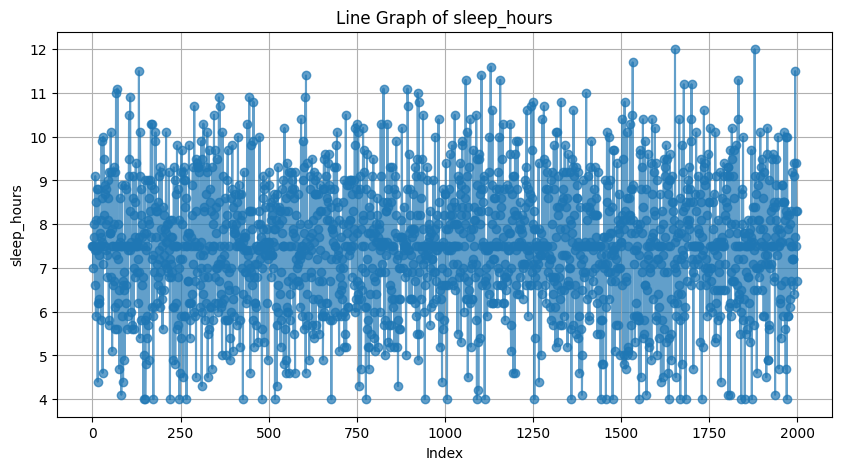

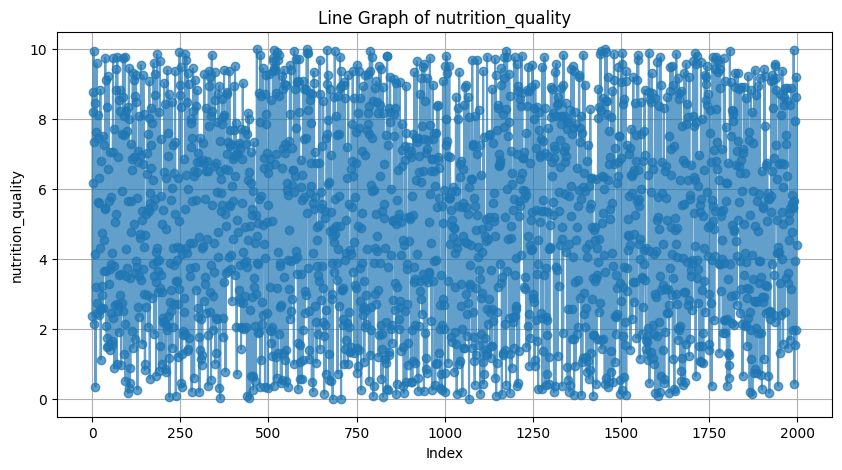

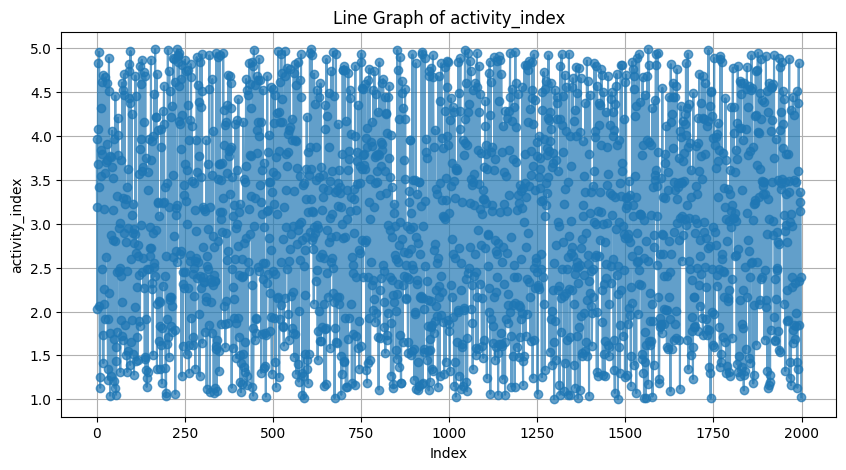

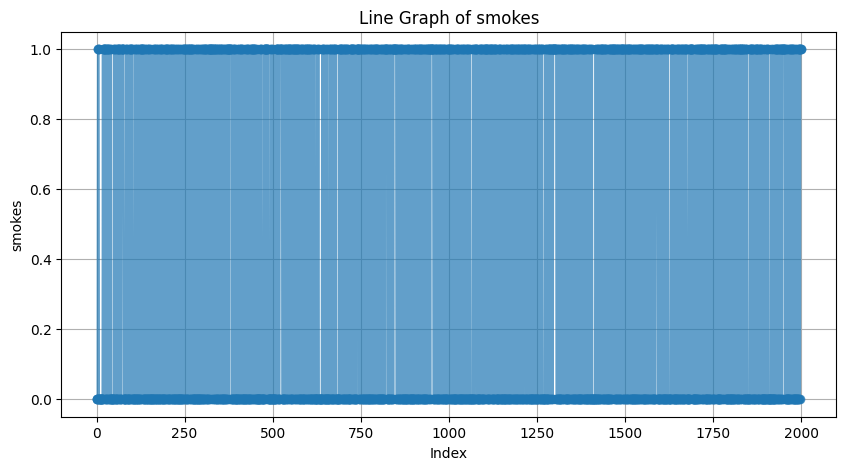

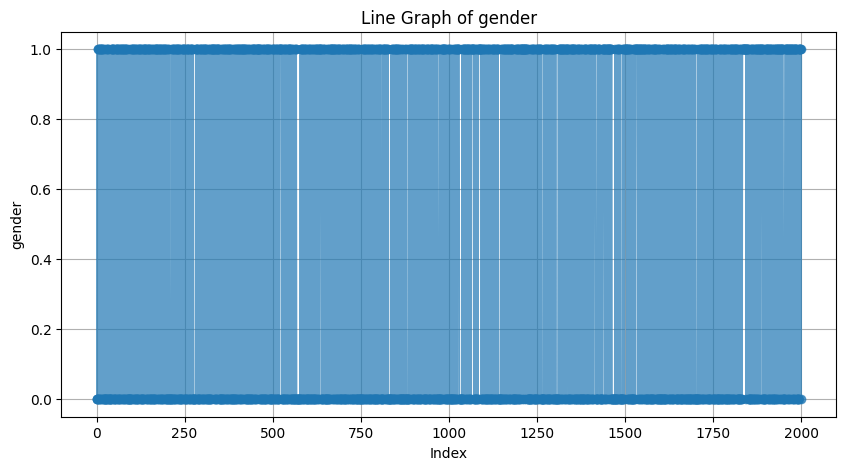

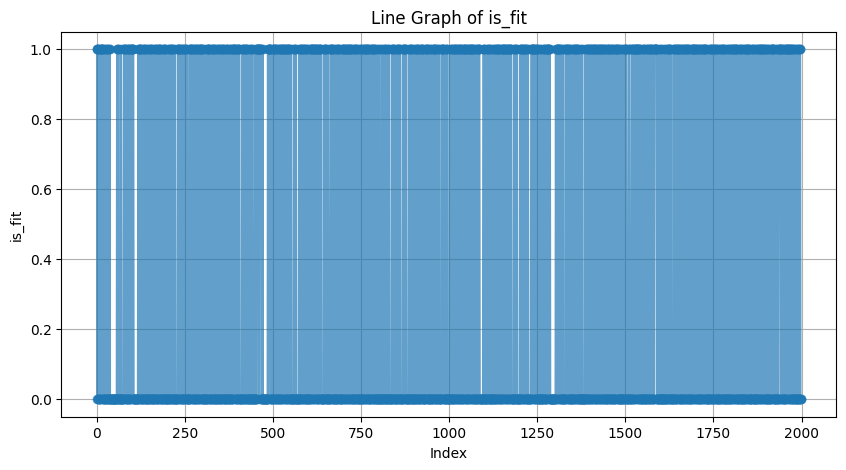

In [18]:
# 3. Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 4. Plot line graph for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.plot(df[col], marker='o', linestyle='-', alpha=0.7)
    plt.title(f"Line Graph of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


Histogram

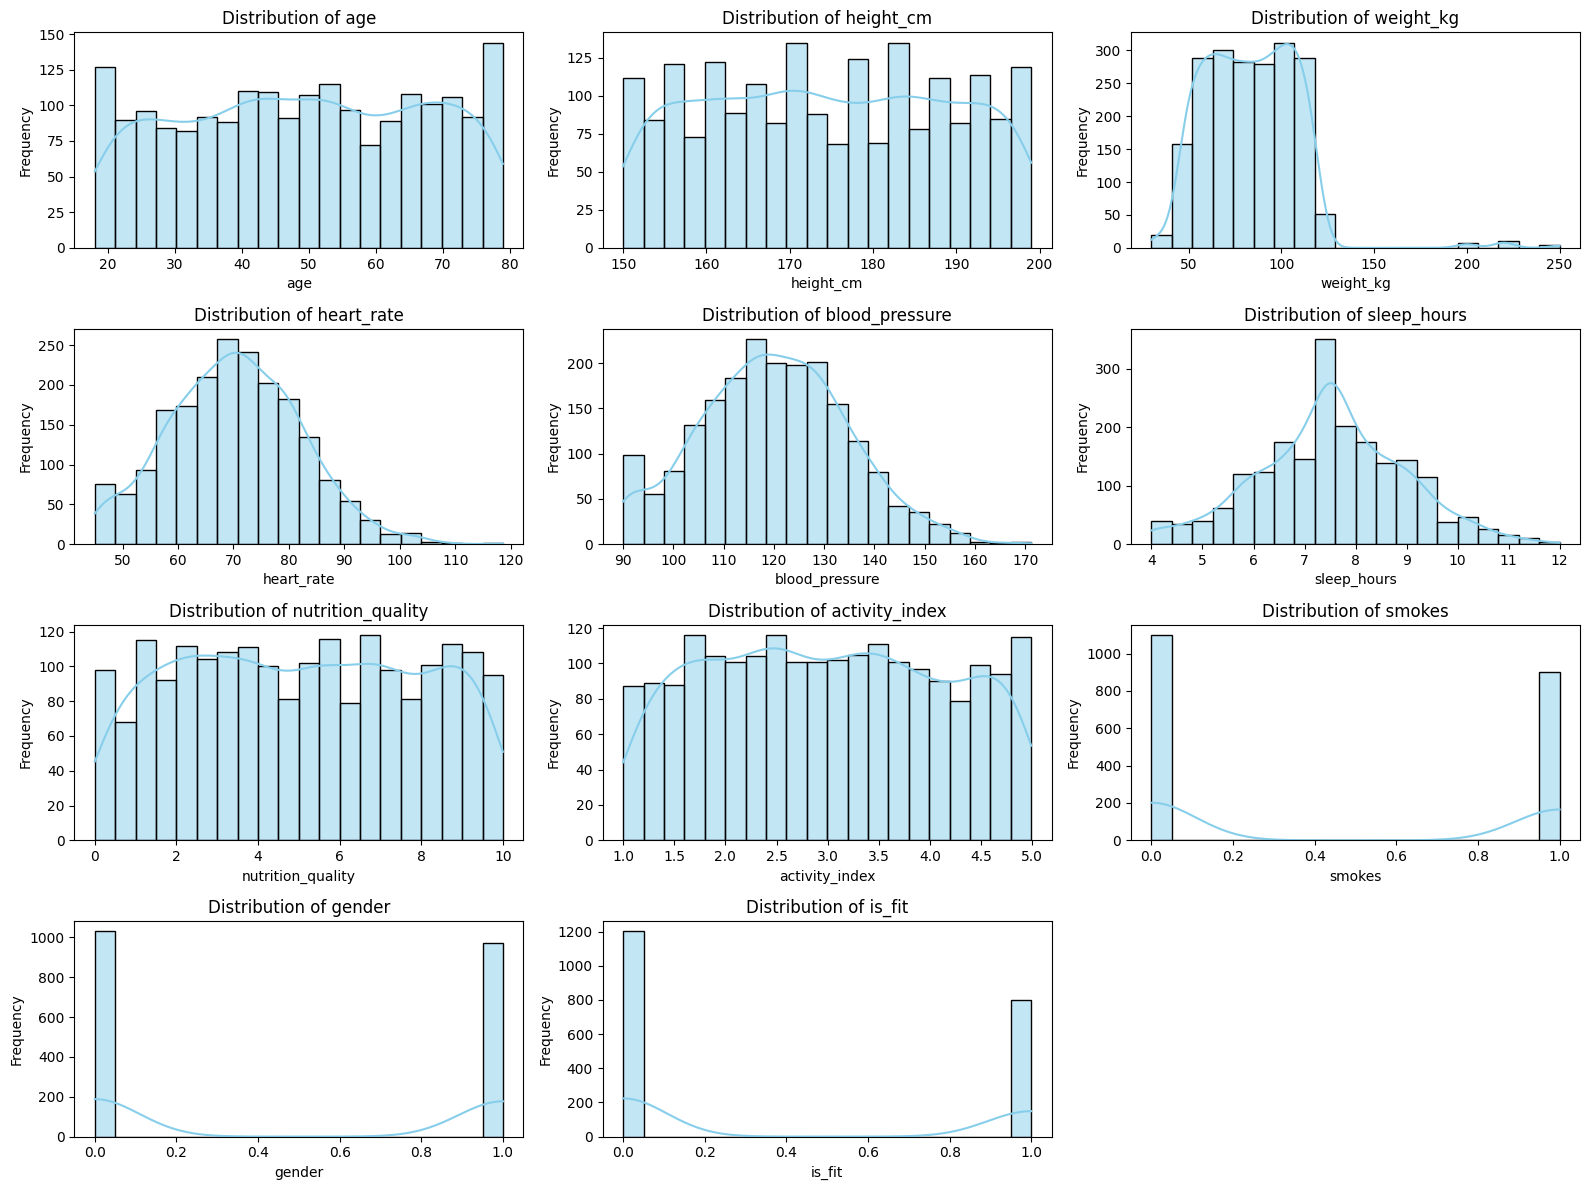

In [19]:
# Set up grid for subplots
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 plots per row
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Area chart

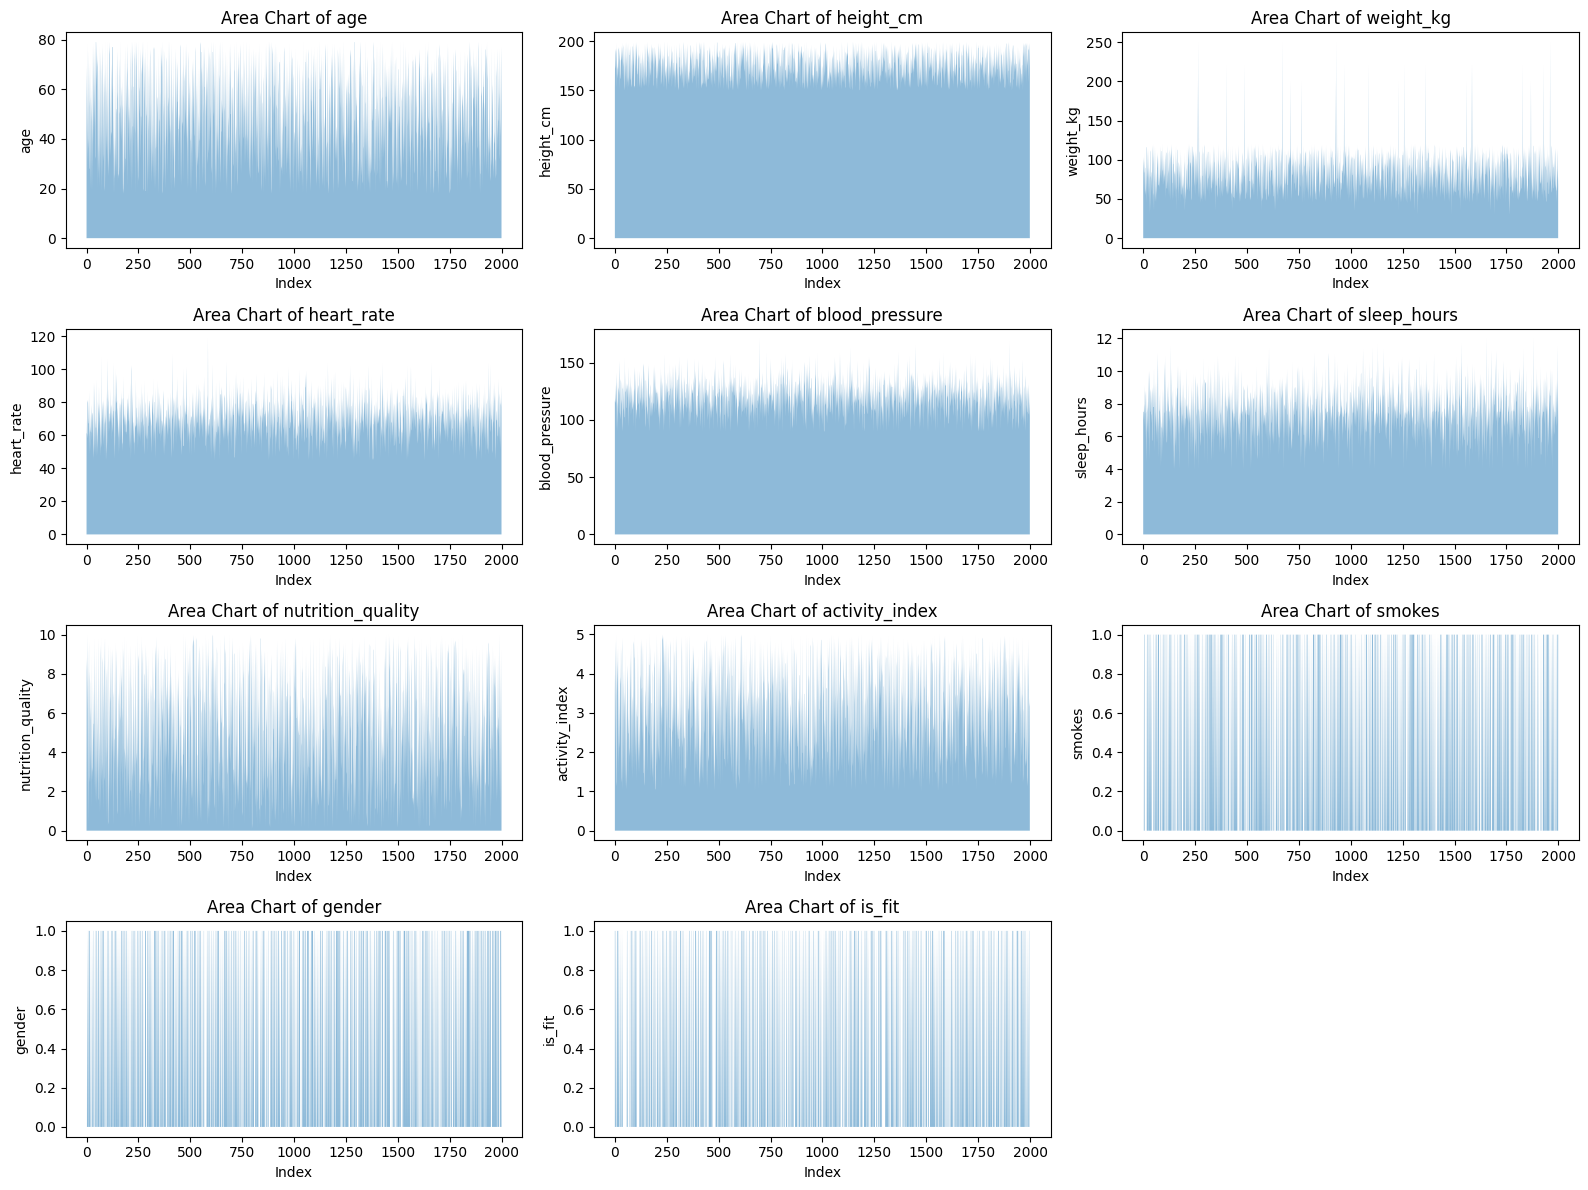

In [20]:
# Plot each numeric column as an area chart
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 per row
    plt.fill_between(df.index, df[col], alpha=0.5)
    plt.title(f"Area Chart of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Dot graph

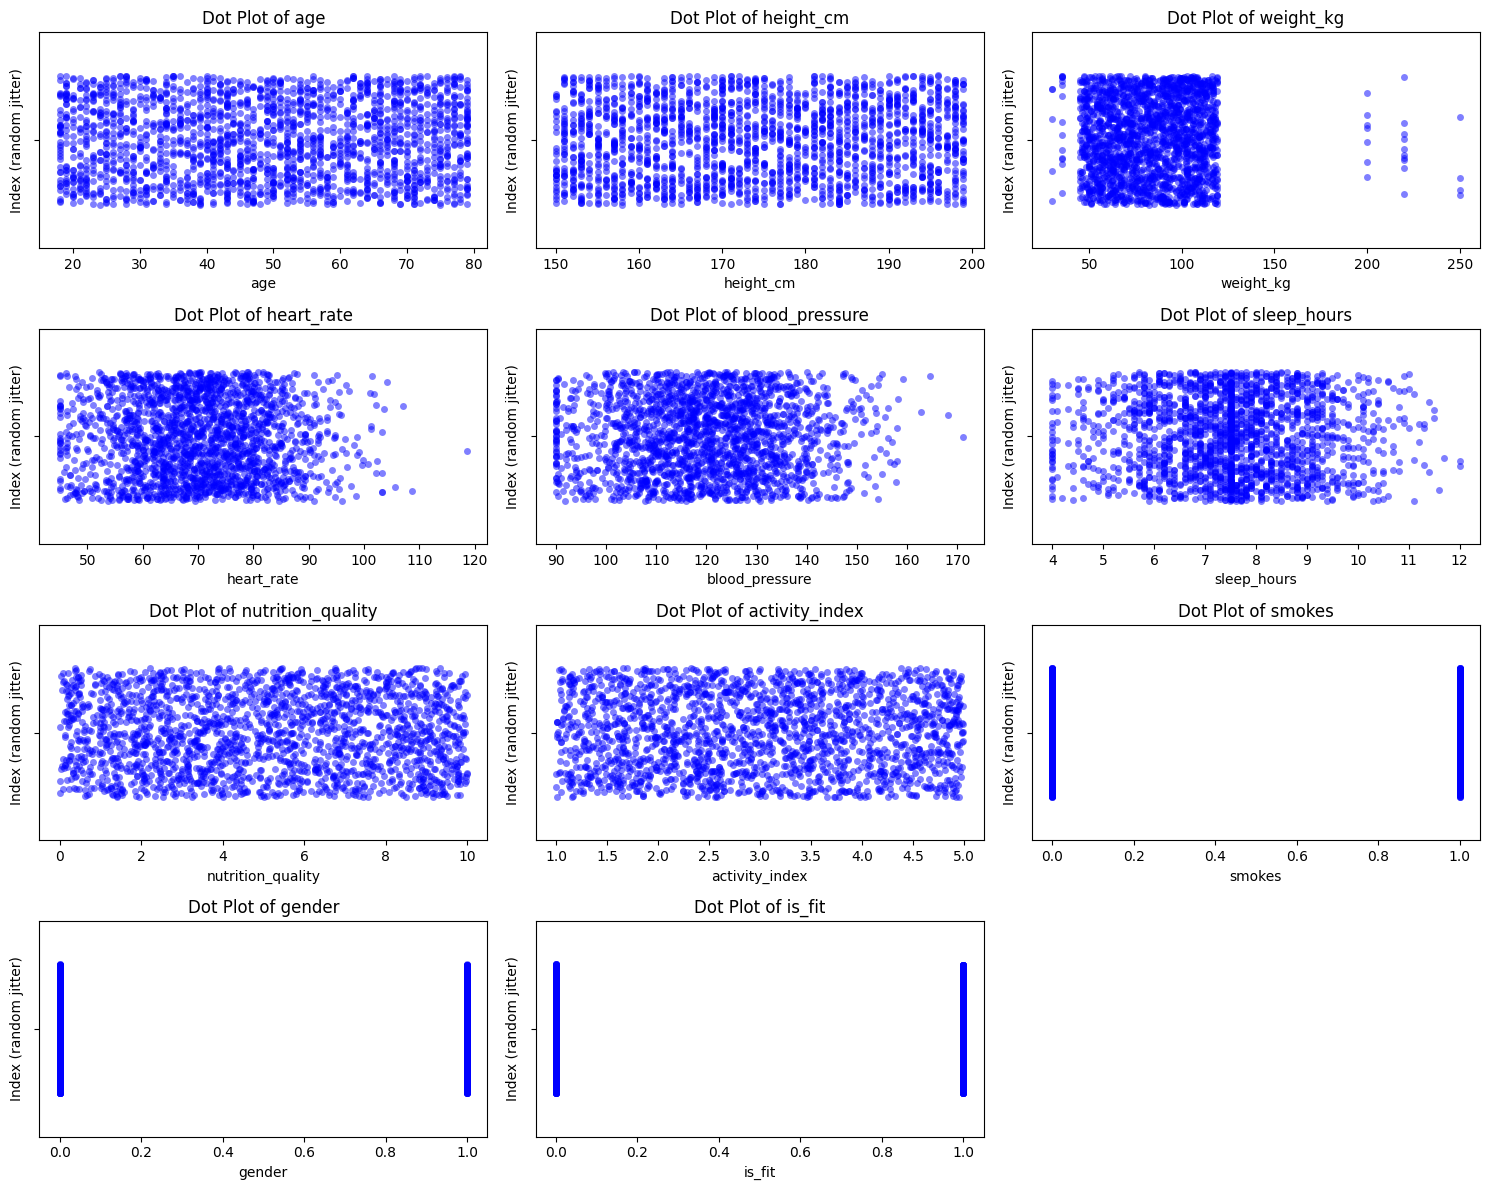

In [21]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 plots per row

    sns.stripplot(x=df[col], color='blue', alpha=0.5, jitter=0.3)  # dot graph
    plt.title(f"Dot Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Index (random jitter)")

plt.tight_layout()
plt.show()

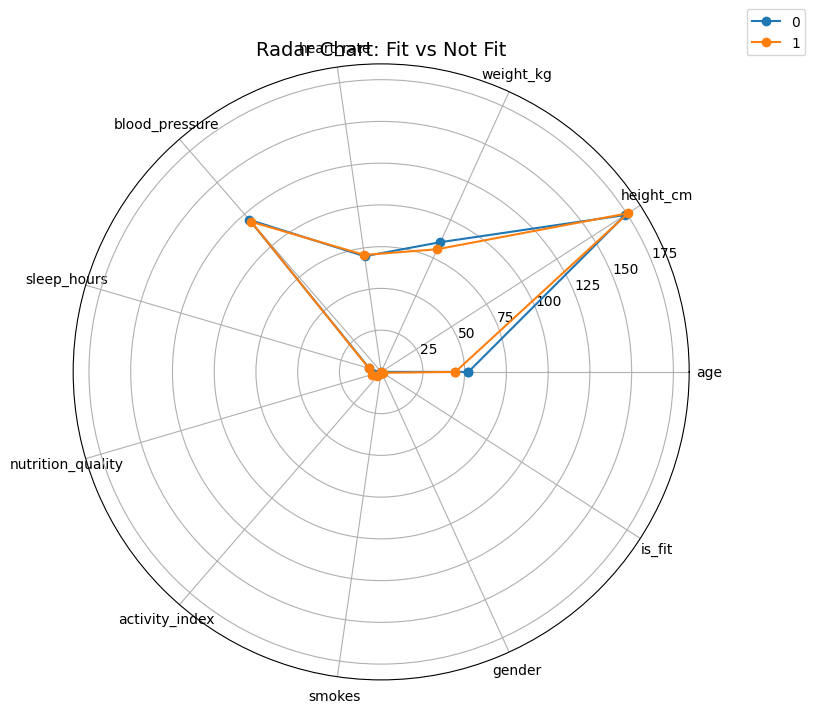

In [22]:
# Compute mean values of numeric features for each class (fit / not fit)
grouped = df.groupby('is_fit')[numeric_cols].mean()

# Number of features
categories = list(grouped.columns)
N = len(categories)

# Angle setup for radar
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8,8))

# Plot each class
for idx, row in grouped.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, marker='o', label=str(idx))

# Add feature labels
plt.xticks(angles[:-1], categories, fontsize=10)

# Add title and legend
plt.title("Radar Chart: Fit vs Not Fit", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

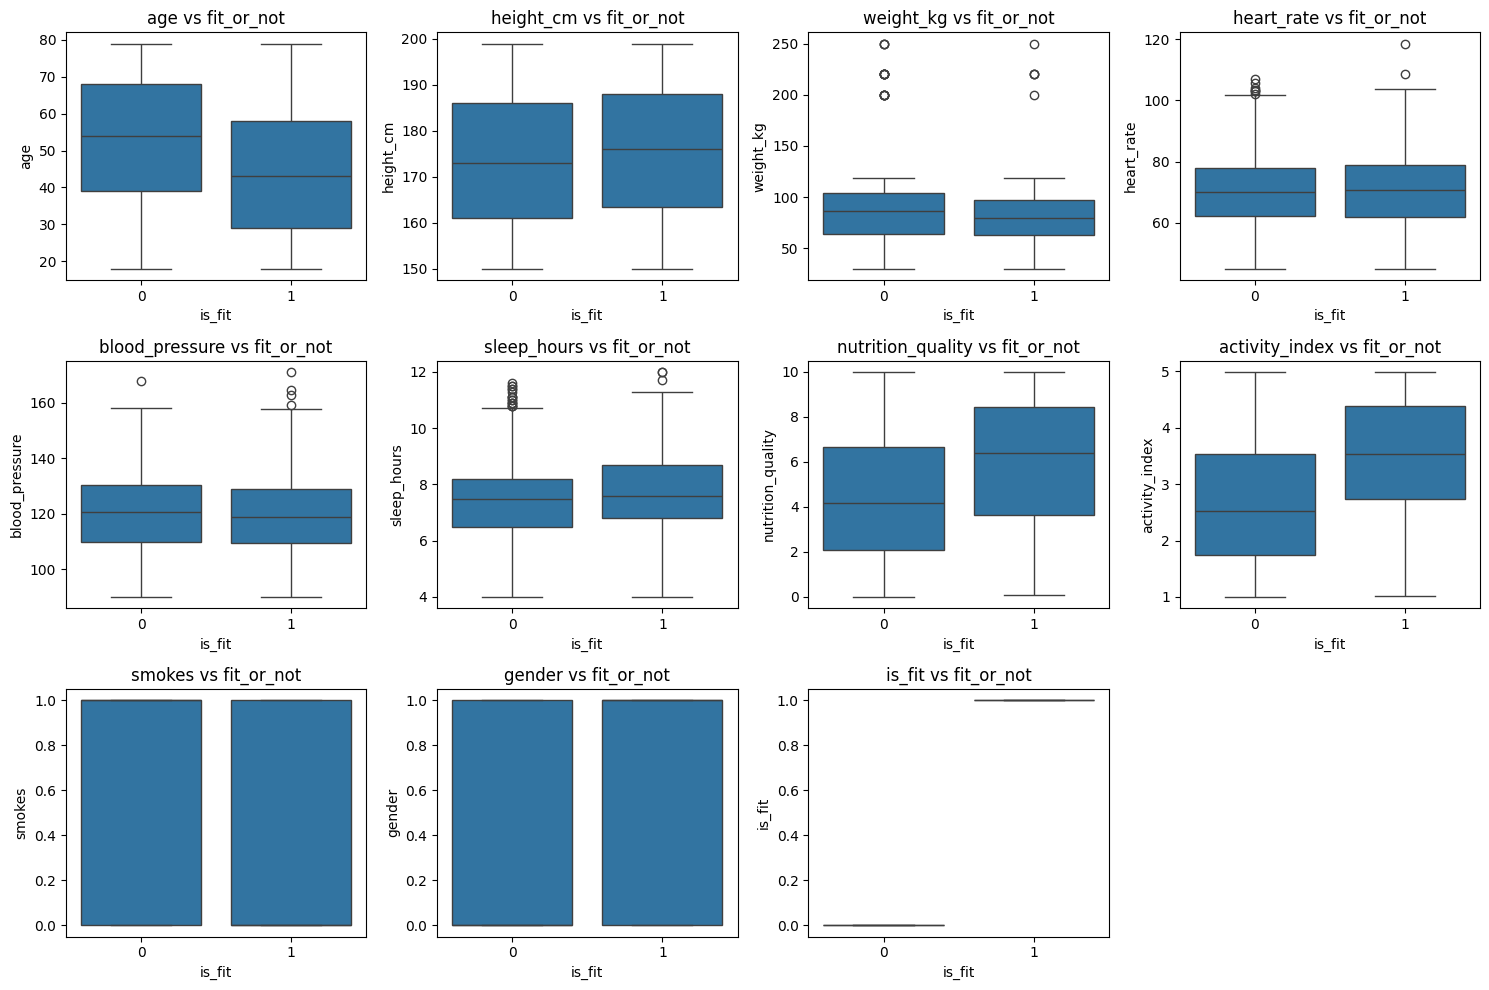

In [23]:

num_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
plt.xticks=45
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)   # adjust depending on number of features
    sns.boxplot(x='is_fit', y=col, data=df)
    plt.title(f'{col} vs fit_or_not')

plt.tight_layout()
plt.show()

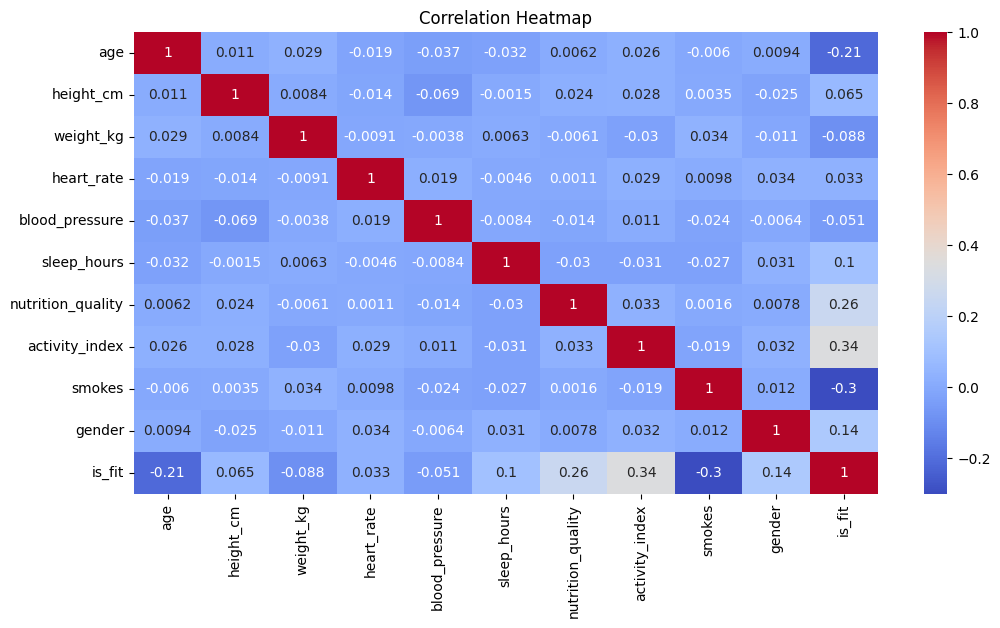

In [24]:
import pandas as pd

# encode target if categorical
df['is_fit'] = df['is_fit'].astype('category').cat.codes

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

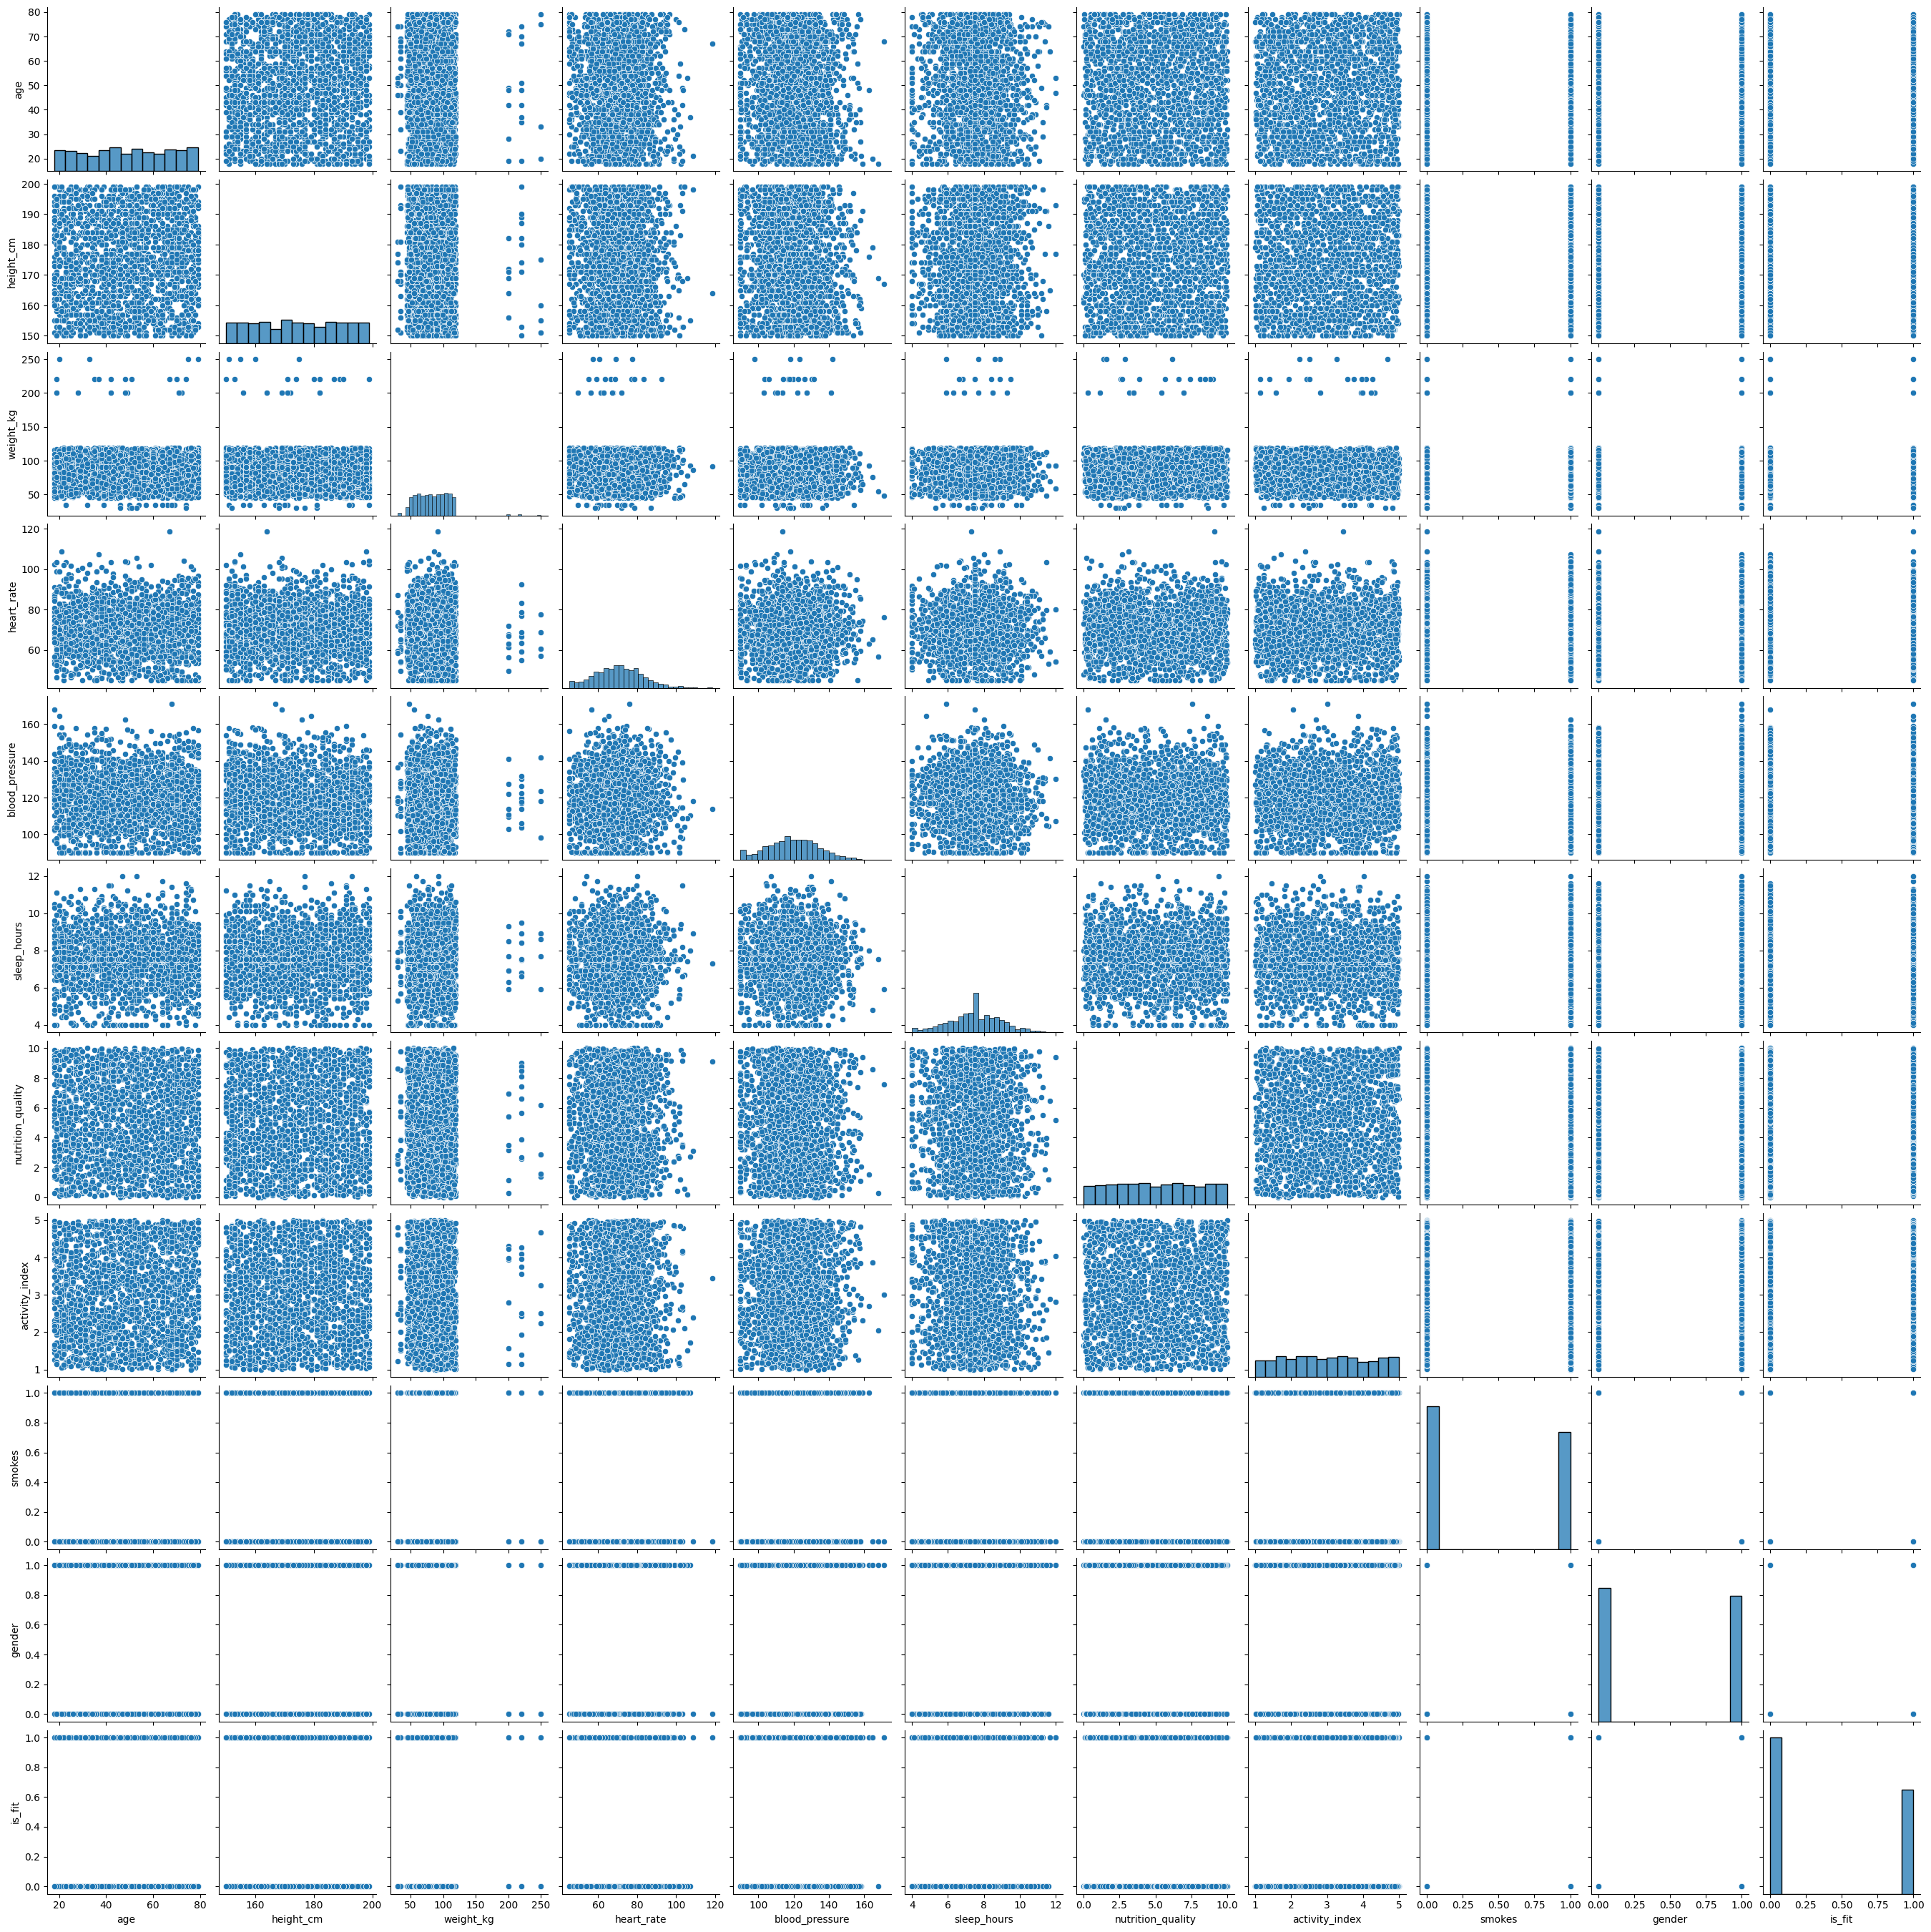

In [25]:
sns.pairplot(df)
plt.show()

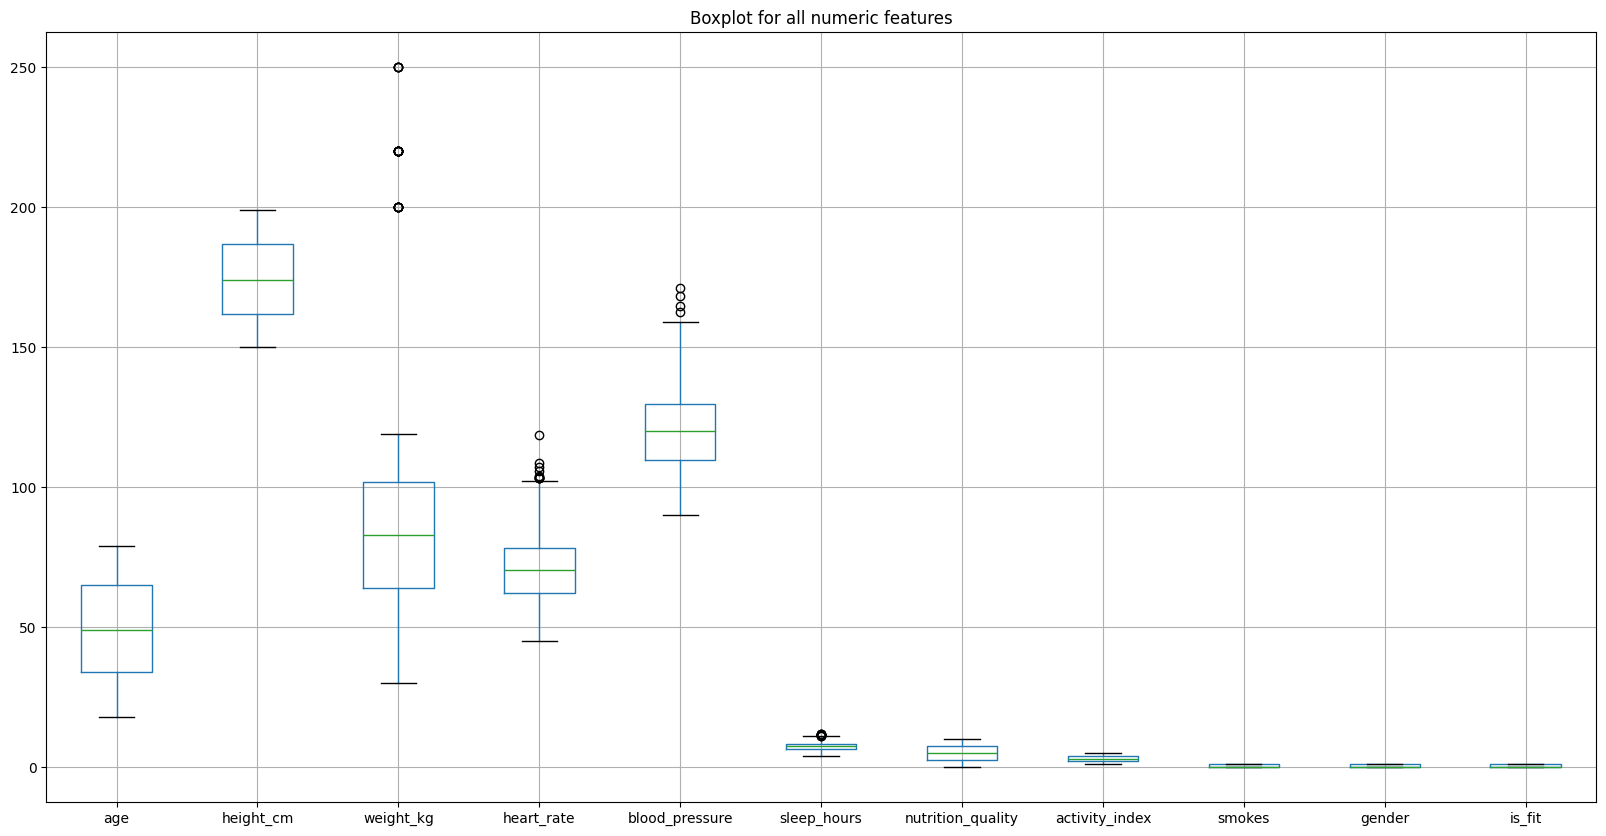

In [26]:

plt.figure(figsize=(20, 10))
df.boxplot()
plt.title("Boxplot for all numeric features")
plt.show()


In [27]:
df1=df.copy()

In [28]:
# Apply log transformation
df['weight_kg_log'] = np.log1p(df['weight_kg'])   # log(1+x) to avoid log(0)
df['heart_rate_log'] = np.log1p(df['heart_rate'])
df['blood_pressure_log'] = np.log1p(df['blood_pressure'])

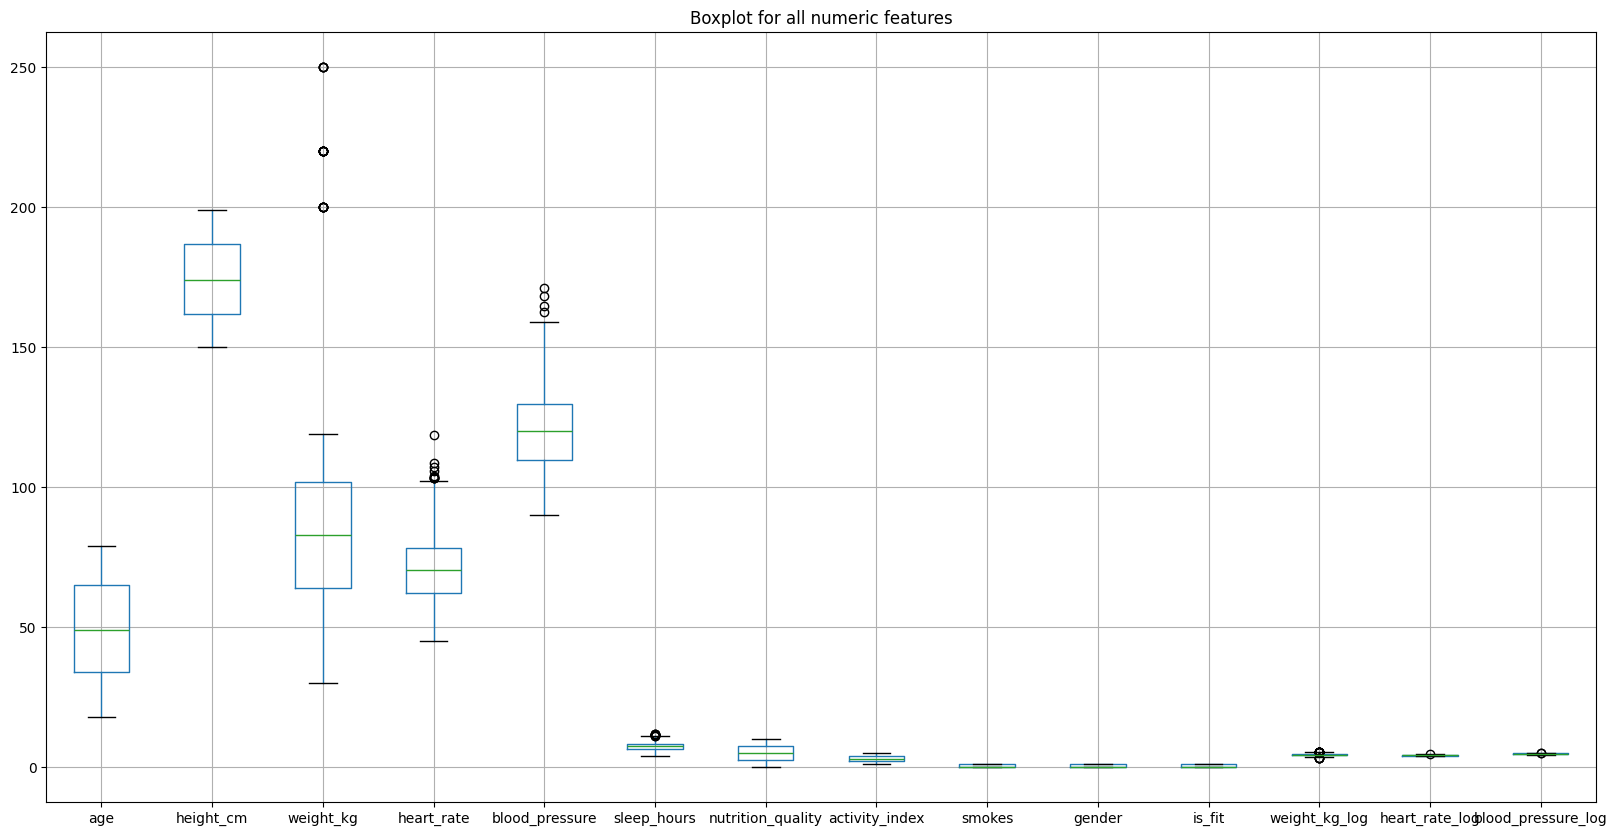

In [29]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.title("Boxplot for all numeric features")
plt.show()

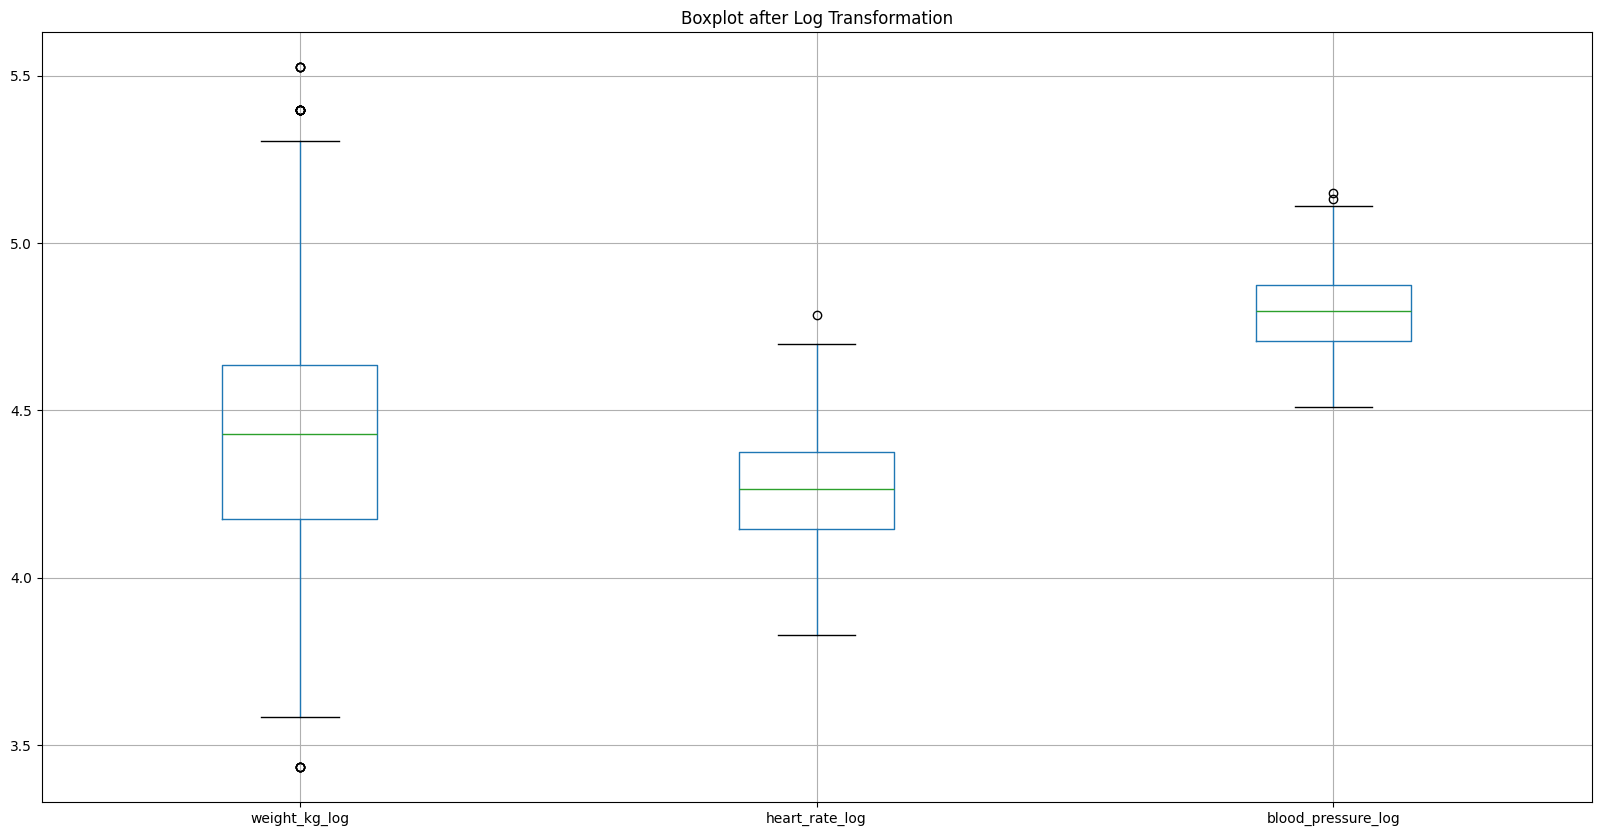

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
df[['weight_kg_log','heart_rate_log','blood_pressure_log']].boxplot()
plt.title("Boxplot after Log Transformation")
plt.show()


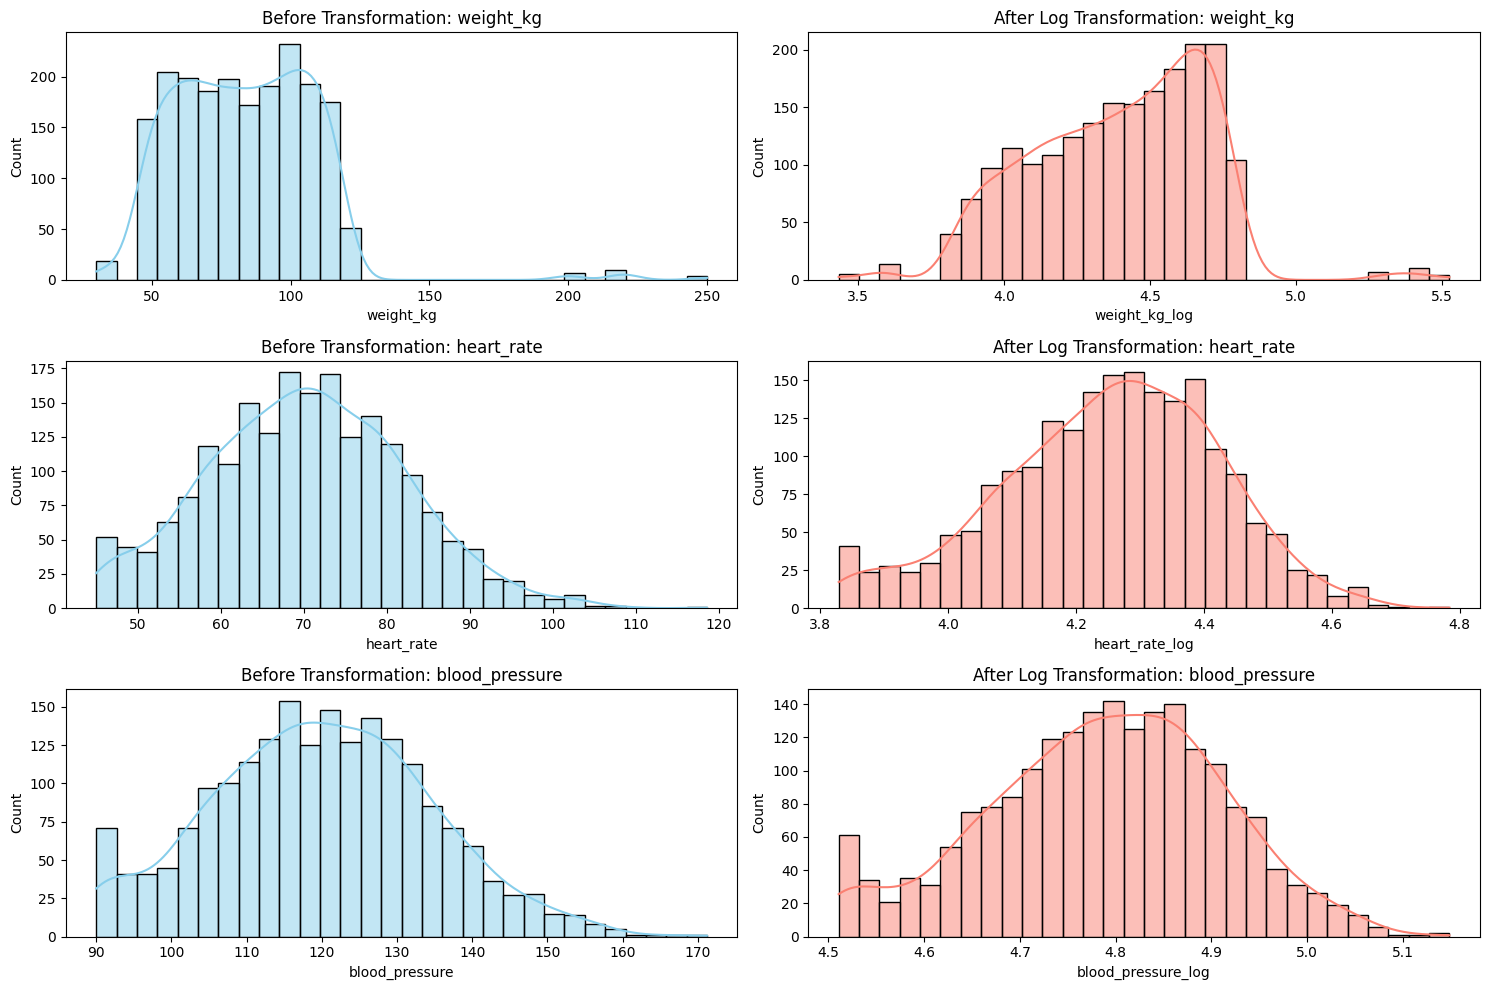

In [33]:
features = ['weight_kg', 'heart_rate', 'blood_pressure']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Before Transformation: {col}")

    plt.subplot(3, 2, 2*i)
    sns.histplot(df[col + '_log'], kde=True, bins=30, color='salmon')
    plt.title(f"After Log Transformation: {col}")

plt.tight_layout()
plt.show()

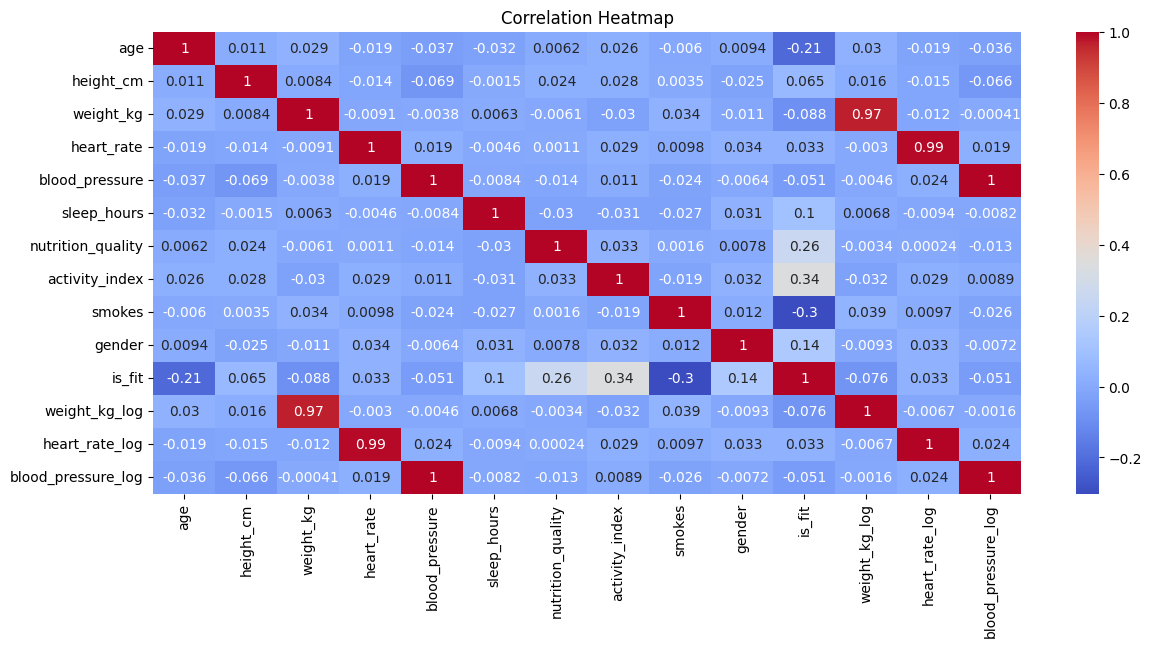

In [36]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
drop_features = ['weight_kg', 'heart_rate', 'height_cm', 'blood_pressure']

# Drop them from dataframe
df = df.drop(columns=drop_features)

print("Remaining features:", df.columns.tolist())

Remaining features: ['age', 'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes', 'gender', 'is_fit', 'weight_kg_log', 'heart_rate_log', 'blood_pressure_log']


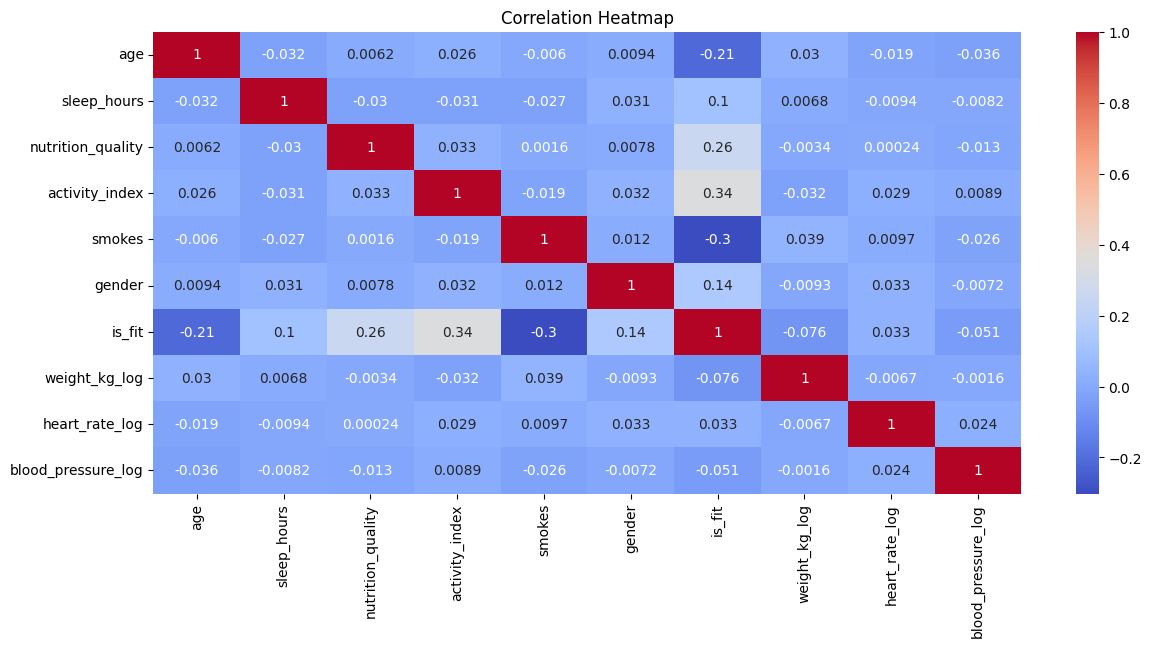

In [38]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature Engineeriong

In [39]:
X=df.drop('is_fit',axis=1)
y=df['is_fit']


In [47]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1600, 9) (1600,)
Test shape: (400, 9) (400,)


In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100)
}

In [51]:
trained_models = {}

for name, model in models.items():
    print(f"[{name}] The model is being trained...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"[{name}] model training is completed.")
    print()

print("\nAll models were trained successfully.")

[Logistic Regression] The model is being trained...
[Logistic Regression] model training is completed.

[Random Forest] The model is being trained...
[Random Forest] model training is completed.

[XGBoost] The model is being trained...
[XGBoost] model training is completed.

[SVM] The model is being trained...
[SVM] model training is completed.

[Gradient Boosting] The model is being trained...
[Gradient Boosting] model training is completed.

[KNN] The model is being trained...
[KNN] model training is completed.

[AdaBoost] The model is being trained...
[AdaBoost] model training is completed.


All models were trained successfully.


In [52]:
results = {}

for name, model in trained_models.items():
    print(f"\n--- {name} Evaluating the Model ---")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
          'Confusion Matrix': cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)


--- Logistic Regression Evaluating the Model ---
Accuracy: 0.7675
F1 Score: 0.6847
ROC-AUC: 0.8401
Confusion Matrix:
 [[206  34]
 [ 59 101]]

--- Random Forest Evaluating the Model ---
Accuracy: 0.7525
F1 Score: 0.6644
ROC-AUC: 0.8032
Confusion Matrix:
 [[203  37]
 [ 62  98]]

--- XGBoost Evaluating the Model ---
Accuracy: 0.7600
F1 Score: 0.6735
ROC-AUC: 0.7850
Confusion Matrix:
 [[205  35]
 [ 61  99]]

--- SVM Evaluating the Model ---
Accuracy: 0.7075
F1 Score: 0.5105
ROC-AUC: 0.7843
Confusion Matrix:
 [[222  18]
 [ 99  61]]

--- Gradient Boosting Evaluating the Model ---
Accuracy: 0.7625
F1 Score: 0.6690
ROC-AUC: 0.8221
Confusion Matrix:
 [[209  31]
 [ 64  96]]

--- KNN Evaluating the Model ---
Accuracy: 0.6825
F1 Score: 0.5695
ROC-AUC: 0.7233
Confusion Matrix:
 [[189  51]
 [ 76  84]]

--- AdaBoost Evaluating the Model ---
Accuracy: 0.7600
F1 Score: 0.6779
ROC-AUC: 0.8290
Confusion Matrix:
 [[203  37]
 [ 59 101]]


In [53]:
print("Performance Summary of All Models:\n")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print("-" * 30)

Performance Summary of All Models:

Model: Logistic Regression
  Accuracy: 0.7675
  F1 Score: 0.6847
  ROC-AUC: 0.8401
------------------------------
Model: Random Forest
  Accuracy: 0.7525
  F1 Score: 0.6644
  ROC-AUC: 0.8032
------------------------------
Model: XGBoost
  Accuracy: 0.7600
  F1 Score: 0.6735
  ROC-AUC: 0.7850
------------------------------
Model: SVM
  Accuracy: 0.7075
  F1 Score: 0.5105
  ROC-AUC: 0.7843
------------------------------
Model: Gradient Boosting
  Accuracy: 0.7625
  F1 Score: 0.6690
  ROC-AUC: 0.8221
------------------------------
Model: KNN
  Accuracy: 0.6825
  F1 Score: 0.5695
  ROC-AUC: 0.7233
------------------------------
Model: AdaBoost
  Accuracy: 0.7600
  F1 Score: 0.6779
  ROC-AUC: 0.8290
------------------------------
